In [ ]:
import pandas as pd

# Загрузка файлов
unemployment = pd.read_excel('/content/drive/MyDrive/диплом_данные/безработица в процентах по субъектам.xlsx')
gdp = pd.read_excel('/content/drive/MyDrive/диплом_данные/ВРП_млн_руб_субъекты.xlsx')
inflation = pd.read_excel('/content/drive/MyDrive/диплом_данные/инфляция индексы по субъектам.xlsx')
loans = pd.read_excel('/content/drive/MyDrive/диплом_данные/объем выданных кредитов по субъектам в млн. руб. по годам.xlsx')
interest_rate = pd.read_excel('/content/drive/MyDrive/диплом_данные/процентная ставка по субъектам рф.xlsx')
income = pd.read_excel('/content/drive/MyDrive/диплом_данные/Средний уровень дохода в тыс. руб..xlsx')

# Вывод первых строк каждого набора данных для осмотра
unemployment.head(), gdp.head(), inflation.head(), loans.head(), interest_rate.head(), income.head()

(                 Регион  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
 0  Белгородская область   4.7   5.2   4.3   3.7   4.0   4.0   4.1   4.0   3.9   
 1      Брянская область  10.7   8.0   7.1   5.1   5.2   5.0   4.6   4.6   4.4   
 2  Владимирская область   8.7   6.1   5.7   4.4   3.8   4.3   5.6   5.6   4.8   
 3   Воронежская область   8.6   7.5   6.4   5.5   4.7   4.5   4.5   4.5   4.3   
 4    Ивановская область  10.8   7.6   6.6   6.3   5.2   4.3   5.6   5.6   4.7   
 
    2018  2019  2020  2021  2022  2023  
 0   4.0   3.9   4.9   4.2   3.7   3.6  
 1   3.9   3.8   4.0   3.4   3.2   2.6  
 2   4.7   4.0   5.6   3.9   2.6   2.0  
 3   3.7   3.5   4.3   3.8   3.5   3.3  
 4   4.2   3.8   5.4   4.5   3.1   3.1  ,
                  Регион      2009      2010      2011      2012      2013  \
 0  Белгородская область  304345.3  398361.4  507839.8  545517.2  569006.4   
 1      Брянская область  126477.4  147024.0  174211.8  207397.5  219502.8   
 2  Владимирская область 

In [ ]:
# Объединение данных по регионам и годам
data_frames = [unemployment.set_index(['Регион']),
               gdp.set_index(['Регион']),
               inflation.set_index(['Регион']),
               loans.set_index(['Регион']),
               interest_rate.set_index(['Регион']),
               income.set_index(['Регион'])]

# Проверка на пропущенные значения, пустые строки и формат данных
for df in data_frames:
    print(df.isnull().sum().sum(), "missing values in", df.columns.name)
    print(df.dtypes, "\n")

# Создание одного общего DataFrame с объединением по индексу (Регион) и колонкам (Годы)
panel_data = pd.concat(data_frames, axis=1, keys=['Unemployment', 'GDP', 'Inflation', 'Loans', 'Interest Rate', 'Income'])
panel_data.columns.names = ['Variable', 'Year']

# Выведем пример данных после объединения
panel_data.sample(5)

0 missing values in None
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
2023    float64
dtype: object 

0 missing values in None
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
2023    float64
dtype: object 

0 missing values in None
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
2023    float64
dtype: object 

0 missing values in None
2009    float64
2010      int64
2011      int64
2012      int64
2013      int64
2014      int64
2015      int64
2016      int64
2017

Variable             Unemployment                                          \
Year                         2009 2010 2011 2012 2013 2014 2015 2016 2017   
Регион                                                                      
Владимирская область          8.7  6.1  5.7  4.4  3.8  4.3  5.6  5.6  4.8   
Тульская область              6.0  5.8  5.3  4.6  4.2  4.1  4.1  4.1  3.9   
Тверская область              7.7  6.6  6.0  5.0  5.3  5.3  5.6  5.8  4.5   
Курская область               8.8  8.2  6.3  5.1  4.6  3.9  4.2  4.3  4.1   
г. Москва                     2.8  1.8  1.4  0.8  1.7  1.5  1.8  1.8  1.4   

Variable                   ... Income                                        \
Year                 2018  ...   2014   2015   2016        2017        2018   
Регион                     ...                                                
Владимирская область  4.7  ...  19451  22593  22217  23367.7751  23343.5197   
Тульская область      3.9  ...  21656  25035  26257  26550.1040  26428.9650   
Тверская область      4.1  ...  20902  23703  24101  24399.1647  25180.6022   
Курская область       4.0  ...  21897  25383  25416  26185.2412  27368.5424   
г. Москва             1.2  ...  55670  60465  61649  64805.0204  68914.9650   

Variable                                                                  
Year                        2019        2020        2021    2022    2023  
Регион                                                                    
Владимирская область  25124.5287  25648.9168  28148.3570   34667   38619  
Тульская область      27624.7709  28314.6100  30935.4404   37146   42341  
Тверская область      27281.1213  27771.2983  30773.1104   36265   41192  
Курская область       29257.6424  29917.4946  32870.6413   39401   42670  
г. Москва             74475.2250  76319.7993  86453.4421  102039  115843  

[5 rows x 90 columns]

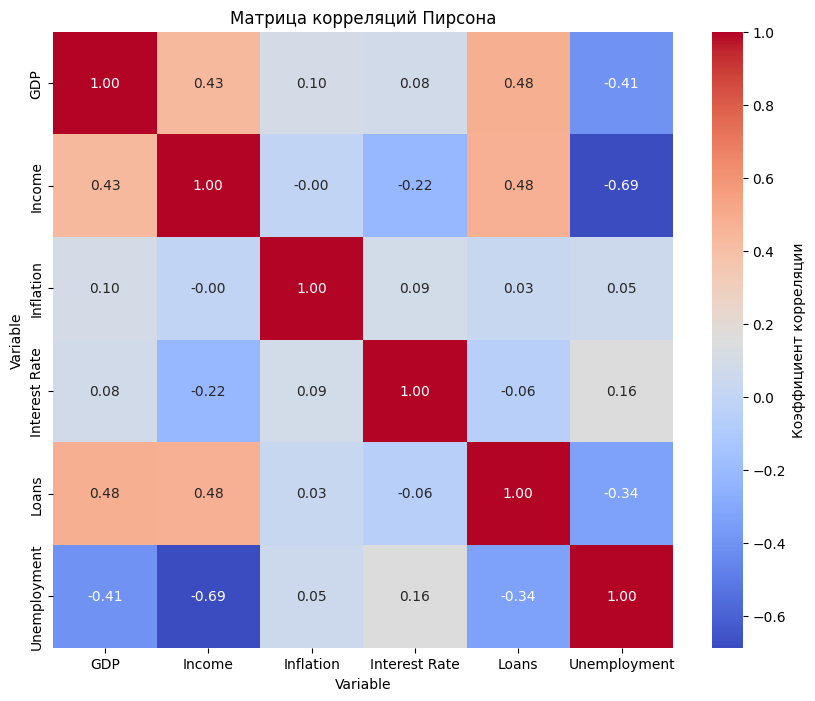

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных для стандартизации: преобразование в "длинный" формат
long_format = panel_data.stack(level='Year').reset_index()

# Стандартизация числовых переменных
scaler = StandardScaler()
numeric_columns = long_format.select_dtypes(include=[np.number]).columns
long_format[numeric_columns] = scaler.fit_transform(long_format[numeric_columns])

# Возврат к "широкому" формату для корреляционного анализа
wide_format = long_format.pivot_table(index=["Регион", "Year"], values=numeric_columns, aggfunc='mean')

# Расчёт корреляции Пирсона
correlation_matrix = wide_format.corr(method='pearson')

correlation_matrix

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Коэффициент корреляции'})
plt.title('Матрица корреляций Пирсона')
plt.show()

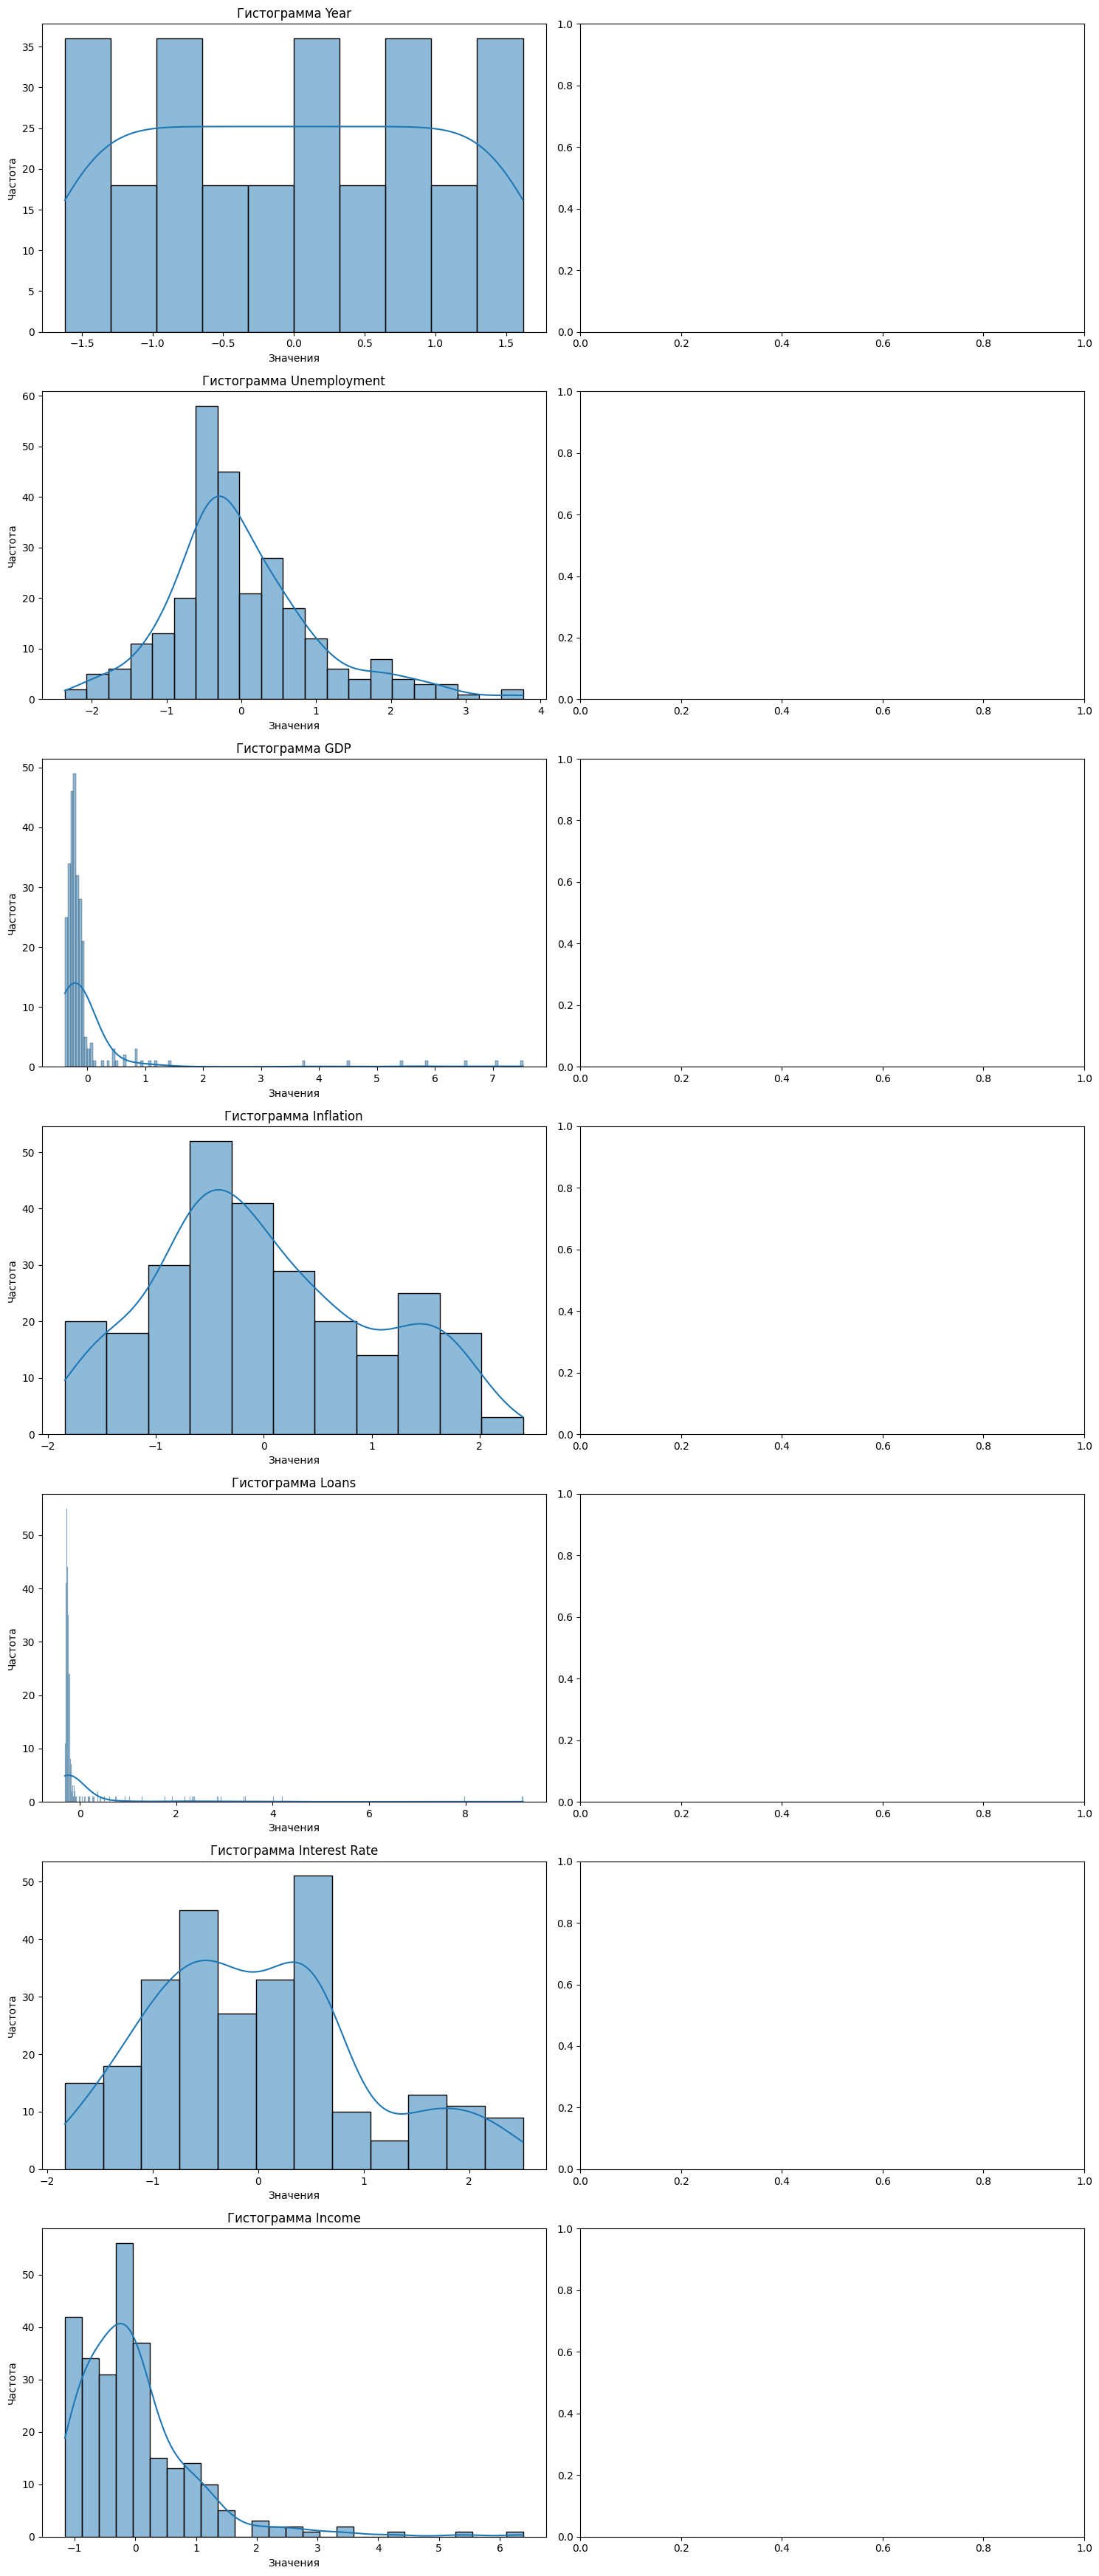

In [ ]:
# Убедимся, что "Year" и "Регион" остаются в качестве столбцов, а не индексов
wide_format = long_format.pivot_table(index=["Регион", "Year"], values=numeric_columns, aggfunc='mean').reset_index()

# Создание фигуры и осей для графиков
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(15, 5 * len(numeric_columns)))

# Проход по всем колонкам для создания графиков
for i, col in enumerate(numeric_columns):
    # Гистограмма
    sns.histplot(wide_format[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Гистограмма {col}')
    axes[i, 0].set_xlabel('Значения')
    axes[i, 0].set_ylabel('Частота')

# Настройка отображения
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Функция для выполнения линейной регрессии и вычисления метрик
def linear_regression_analysis(data, target_variable, feature_variables):
    X = data[feature_variables]
    y = data[target_variable]

    model = LinearRegression()
    model.fit(X, y)

    predictions = model.predict(X)

    r2 = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)

    return model, r2, mse, mae

# Выполнение анализа
features = ['Loans', 'Interest Rate']
target = 'GDP'
model, r2, mse, mae = linear_regression_analysis(wide_format, target, features)

print(f'Linear Regression R^2: {r2}')
print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression MAE: {mae}')

Linear Regression R^2: 0.2425083562092888
Linear Regression MSE: 0.7574916437907114
Linear Regression MAE: 0.3379495075805306


In [ ]:
import statsmodels.formula.api as smf

# Преобразование данных для регрессионного анализа
wide_format.reset_index(inplace=True)

# Метод случайных эффектов
model_re = smf.mixedlm("GDP ~ Unemployment + Inflation + Loans + Interest_Rate + Income",
                       data=wide_format,
                       groups=wide_format["Регион"])
result_re = model_re.fit()

# Прогнозирование
y_pred_re = result_re.predict(wide_format)
y_true = wide_format['GDP']

# Вычисление метрик
r2_re = r2_score(y_true, y_pred_re)
mse_re = mean_squared_error(y_true, y_pred_re)
mae_re = mean_absolute_error(y_true, y_pred_re)

print("Random Effects Model")
print(f"R^2: {r2_re:.4f}")
print(f"MSE: {mse_re:.4f}")
print(f"MAE: {mae_re:.4f}")

Random Effects Model
R^2: -0.0776
MSE: 1.0776
MAE: 0.4712


In [ ]:
# Метод фиксированных эффектов
model_fe = smf.ols("GDP ~ Loans + Interest_Rate",
                   data=wide_format)
result_fe = model_fe.fit()

# Прогнозирование
y_pred_fe = result_fe.predict(wide_format)
y_true = wide_format['GDP']

# Вычисление метрик
r2_fe = r2_score(y_true, y_pred_fe)
mse_fe = mean_squared_error(y_true, y_pred_fe)
mae_fe = mean_absolute_error(y_true, y_pred_fe)

print("Fixed Effects Model")
print(f"R^2: {r2_fe:.4f}")
print(f"MSE: {mse_fe:.4f}")
print(f"MAE: {mae_fe:.4f}")

Fixed Effects Model
R^2: 0.6433
MSE: 0.3567
MAE: 0.3195


In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if (self.max_depth is not None and depth >= self.max_depth) or num_samples < self.min_samples_split:
            return np.mean(y)

        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return np.mean(y)

        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold

        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_tree, right_tree)

    def _best_split(self, X, y):
        num_samples, num_features = X.shape
        if num_samples <= 1:
            return None, None

        best_feature, best_threshold = None, None
        best_mse = float('inf')

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                left_y = y[left_indices]
                right_y = y[right_indices]
                mse = len(left_y) * np.var(left_y) + len(right_y) * np.var(right_y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs):
        tree = self.tree
        while isinstance(tree, tuple):
            feature, threshold, left_tree, right_tree = tree
            if inputs[feature] < threshold:
                tree = left_tree
            else:
                tree = right_tree
        return tree

In [ ]:
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        n_samples = X.shape[0]
        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            sample_X = X[indices]
            sample_y = y[indices]
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)

In [ ]:
wide_format

Variable,index,Регион,Year,GDP,Income,Inflation,Interest_Rate,Loans,Unemployment
0,0,Белгородская область,-1.620185,-0.251569,-0.756652,0.394201,0.616988,-0.281121,0.029713
1,1,Белгородская область,-1.388730,-0.196274,-0.717608,0.421250,0.616845,-0.228596,0.335913
2,2,Белгородская область,-1.157275,-0.131886,-0.693792,-0.636690,-0.119705,-0.247705,-0.215247
3,3,Белгородская область,-0.925820,-0.109726,-0.485790,-0.417287,-0.467547,-0.232990,-0.582688
4,4,Белгородская область,-0.694365,-0.095911,-0.370580,-0.417287,2.058039,-0.232396,-0.398967
...,...,...,...,...,...,...,...,...,...
265,265,г. Москва,0.694365,0.472927,3.366153,-1.285880,-0.474766,4.007852,-1.991208
266,266,г. Москва,0.925820,0.488676,3.500654,-1.156643,-1.195963,2.920785,-1.256328
267,267,г. Москва,1.157275,0.667485,4.239571,-0.170836,-0.621175,4.189841,-1.256328
268,268,г. Москва,1.388730,0.853264,5.376027,1.223722,-1.319385,-0.160046,-1.501288


In [ ]:
# Подготовка данных для обучения
X = wide_format[['Loans', 'Interest_Rate']].values
y = wide_format['GDP'].values

# Обучение модели случайного леса
rf = RandomForest(n_estimators=100, max_depth=10, min_samples_split=10)
rf.fit(X, y)
y_pred = rf.predict(X)

# Оценка модели
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f'R²: {r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R²: 0.7913
MSE: 0.2087
MAE: 0.1576
